# Data Exploration for Follower Mk1

## Data Import

In [2]:
import pandas as pd

# import data.xlsx
data_path = "./data.xlsx"
xls = pd.ExcelFile(data_path)

data = pd.read_excel(xls, 'Follower_Mk1')

data.head()

,Date,Leader's Price,Follower's Price,Cost
0,1,1.721828,1.774033,1
1,2,1.779242,1.793029,1
2,3,1.787140,1.786484,1
3,4,1.773467,1.773290,1
4,5,1.746195,1.810835,1


## General Information

In [3]:
print('General Information:')
print(data.describe())
print()

print('Pearson Correlation Information : -1 (perfect negative) to 1 (perfect positive):')
print(data.corr(method='pearson'))
print()

print('Spearman Correlation Information: -1 (strong negative monotone) to 1 (strong positive monotone)')
print(data.corr(method='spearman'))
print()

print('Kendall Correlation Information: -1 (perfect negative) to 1 (perfect positive)')
print(data.corr(method='kendall'))
print()

print(f'All in the range ~0.2 - insignificant correlation.')

General Information:
             Date  Leader's Price  Follower's Price   Cost
count  100.000000      100.000000        100.000000  100.0
mean    50.500000        1.790985          1.804405    1.0
std     29.011492        0.047355          0.024450    0.0
min      1.000000        1.715351          1.767627    1.0
25%     25.750000        1.772601          1.786155    1.0
50%     50.500000        1.779820          1.802264    1.0
75%     75.250000        1.807109          1.818981    1.0
max    100.000000        1.899950          1.876574    1.0

Pearson Correlation Information : -1 (perfect negative) to 1 (perfect positive):
                      Date  Leader's Price  Follower's Price  Cost
Date              1.000000        0.055074          0.008783   NaN
Leader's Price    0.055074        1.000000          0.255714   NaN
Follower's Price  0.008783        0.255714          1.000000   NaN
Cost                   NaN             NaN               NaN   NaN

Spearman Correlation Informati

## Plot Leader vs Follower Prices

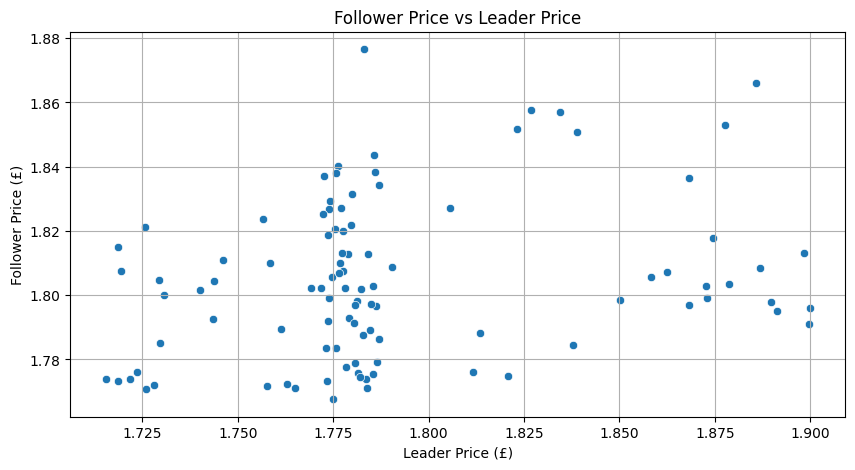

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x="Leader's Price", y="Follower's Price", data=data)
plt.title('Follower Price vs Leader Price')
plt.xlabel('Leader Price (£)')
plt.ylabel('Follower Price (£)')
plt.grid(True)
plt.show()

## Plot Prices vs Date 

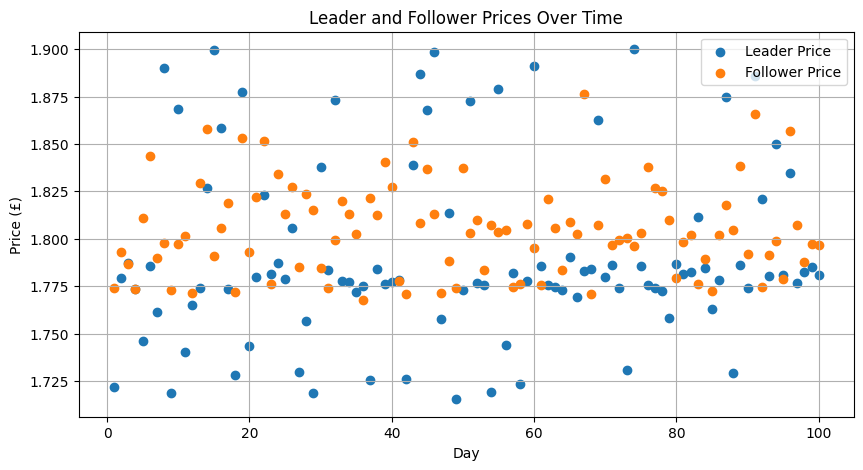

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(data["Date"], data["Leader's Price"], label='Leader Price')
plt.scatter(data['Date'], data["Follower's Price"], label='Follower Price')
plt.title('Leader and Follower Prices Over Time')
plt.xlabel('Day')
plt.ylabel('Price (£)')
plt.legend()
plt.grid(True)
plt.show()

## Lag Analysis
If the follower takes >1 day to react to leader's previous prices, a temporal dependency may be in place.
We plot the follower's response with varying levels of 'lag'.

Pearson Correlation with Lag 1: -0.19100746505495392


C:\Users\Jonah\AppData\Local\Temp\ipykernel_1644\4260408013.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


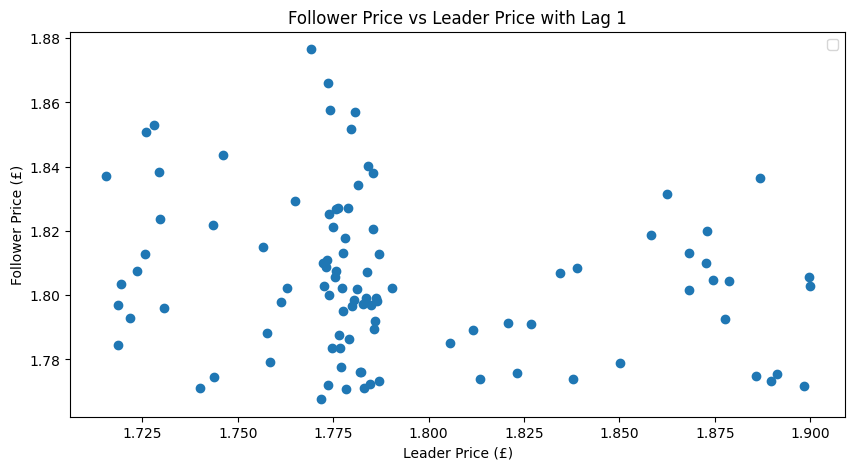

Pearson Correlation with Lag 2: 0.050019082507141384


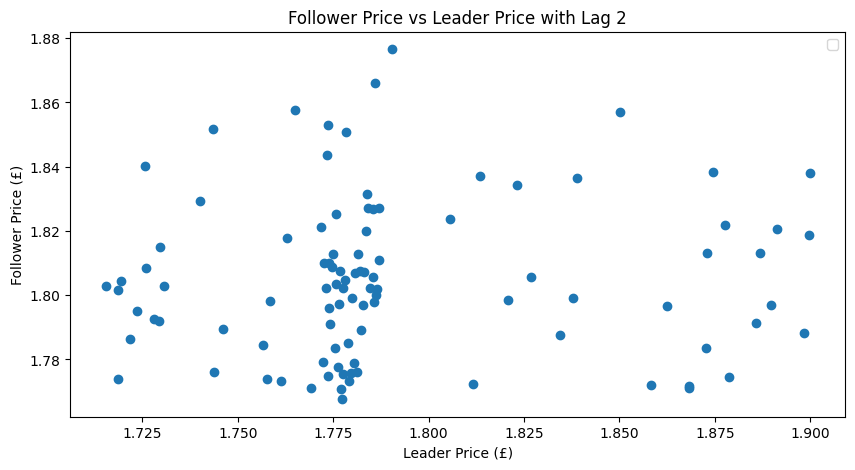

Pearson Correlation with Lag 3: -0.04971071861389502


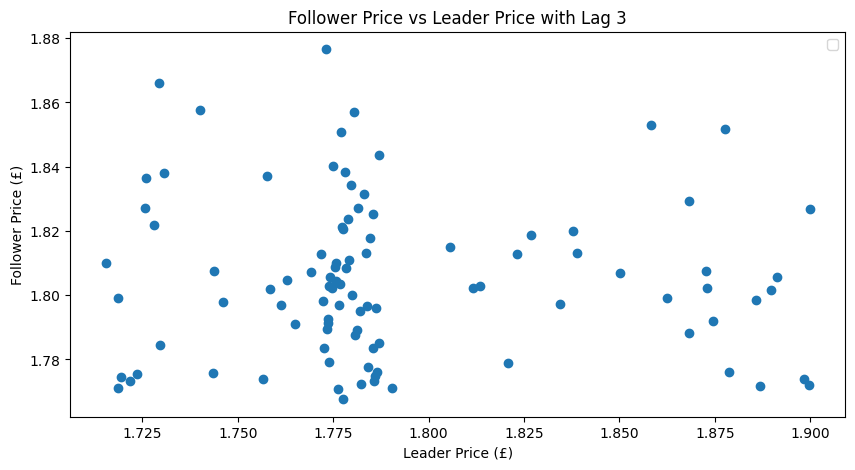

Pearson Correlation with Lag 4: -0.006276845355685186


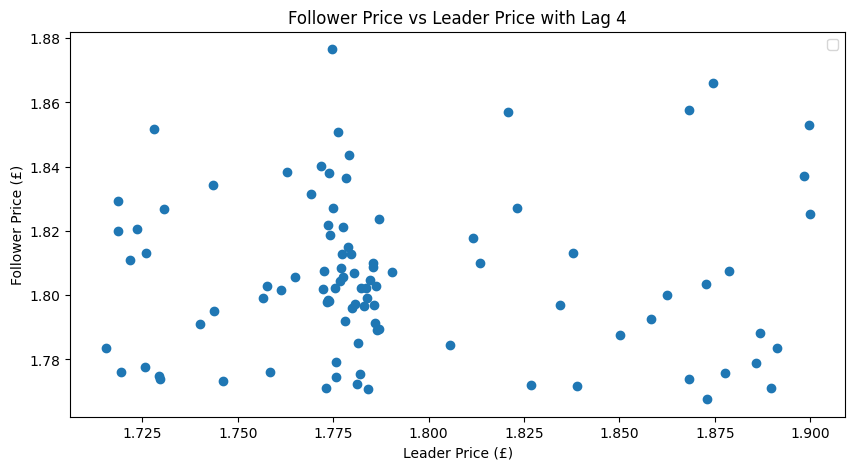

Pearson Correlation with Lag 5: 0.05113391057169892


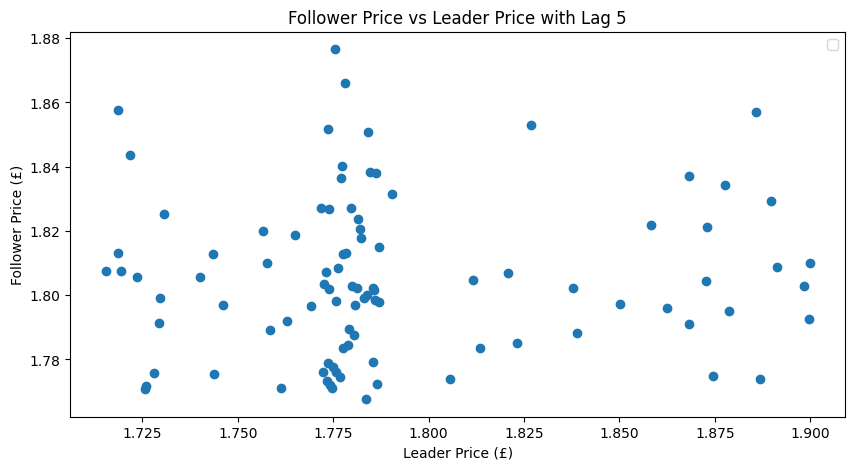

In [6]:
lags = range(1, 6)

for lag in lags:
    lagged_data = data.copy()
    lagged_data["Leader's Price"] = lagged_data["Leader's Price"].shift(lag)
    print(f'Pearson Correlation with Lag {lag}: ', end='')
    print(lagged_data.corr(method='pearson').loc["Leader's Price", "Follower's Price"])

    plt.figure(figsize=(10, 5))
    plt.scatter(lagged_data["Leader's Price"], lagged_data["Follower's Price"])
    plt.title(f'Follower Price vs Leader Price with Lag {lag}')
    plt.xlabel('Leader Price (£)')
    plt.ylabel('Follower Price (£)')

    plt.legend()
    plt.show()

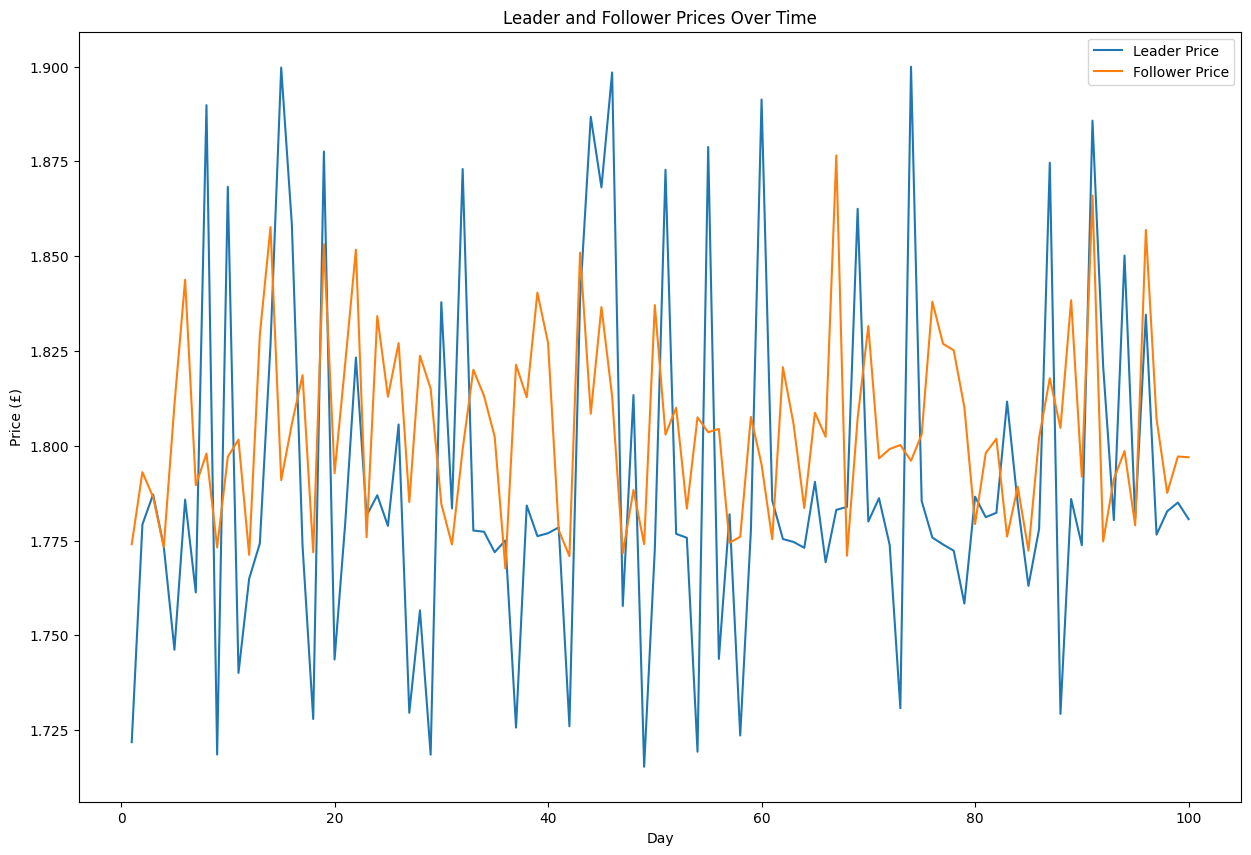

Lag Order Selection Results (optimal lag = 0):
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0      -13.67*     -13.61*  1.154e-06*     -13.65*
1       -13.61      -13.42   1.228e-06      -13.54
2       -13.52      -13.21   1.344e-06      -13.40
3       -13.51      -13.08   1.360e-06      -13.34
4       -13.42      -12.86   1.489e-06      -13.20
5       -13.37      -12.69   1.561e-06      -13.10
6       -13.32      -12.52   1.646e-06      -13.00
7       -13.30      -12.38   1.689e-06      -12.93
8       -13.23      -12.18   1.824e-06      -12.81
9       -13.19      -12.02   1.906e-06      -12.72
10      -13.12      -11.82   2.070e-06      -12.60
11      -13.10      -11.68   2.129e-06      -12.53
12      -13.01      -11.46   2.361e-06      -12.39
13      -12.92      -11.25   2.615e-06      -12.26
14      -12.88      -11.09   2.761e-06      -12.17
15      -12.79      -10.88   3.087e

TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

# plot both series
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Leader's Price"], label='Leader Price')
plt.plot(data['Date'], data["Follower's Price"], label='Follower Price')
plt.title('Leader and Follower Prices Over Time')
plt.xlabel('Day')
plt.ylabel('Price (£)')
plt.legend()
plt.show()

# Select Optimal Lag for use in Granger Causality Test
model = VAR(data[["Follower's Price", "Leader's Price"]])
results = model.select_order(maxlags=25)
optimal_lag = results.selected_orders['aic']
print(f'Lag Order Selection Results (optimal lag = {optimal_lag}):')
print(results.summary())


## Binning and Response Curves

C:\Users\Jonah\AppData\Local\Temp\ipykernel_1644\2050135342.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('Leader Price Bin')["Follower's Price"].mean().reset_index()


Text(0.5, 1.0, 'Average Follower Price by Leader Price Bin')

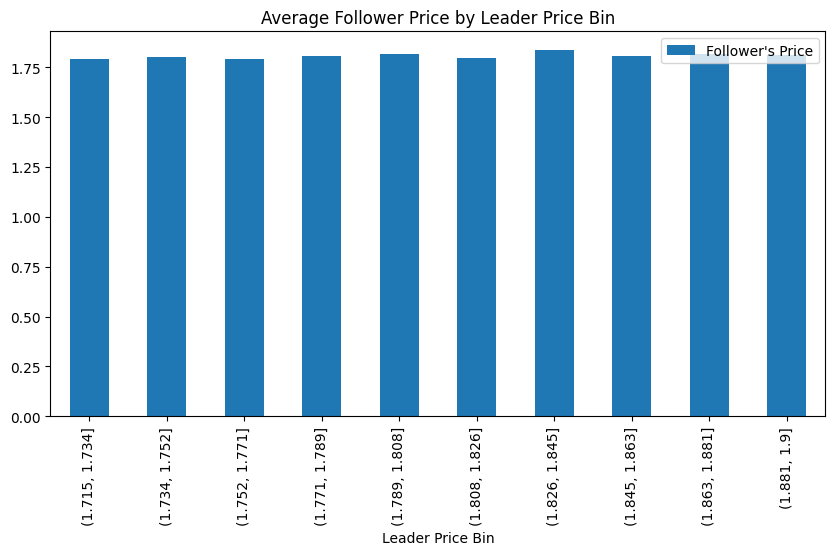

In [7]:
data['Leader Price Bin'] = pd.cut(data["Leader's Price"], bins=10)
grouped = data.groupby('Leader Price Bin')["Follower's Price"].mean().reset_index()
grouped.head()

grouped.plot(kind='bar', x='Leader Price Bin', y='Follower\'s Price', figsize=(10, 5))
plt.title('Average Follower Price by Leader Price Bin')

## Local Regression (LOESS/LOWESS)
Plot a smoothed curve showing how follower price changes with leader price — good for capturing non-linear trends.

Note: you may need to restart the kernel to use updated packages.


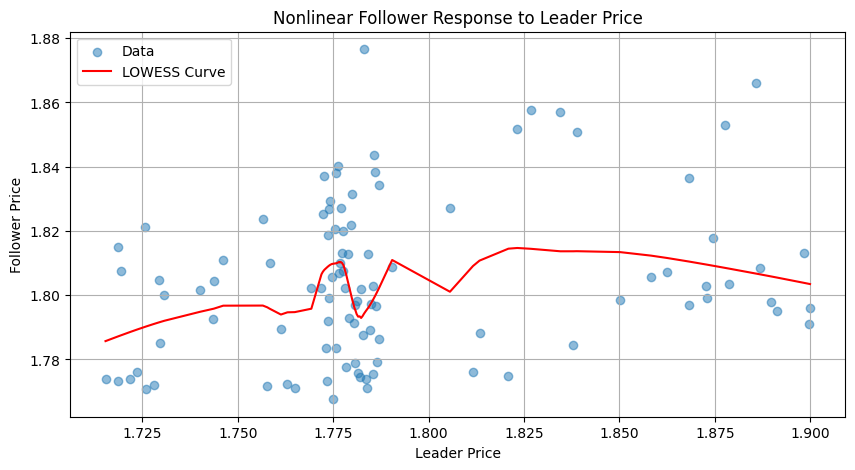

In [8]:
%pip install statsmodels
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
smoothed = lowess(data["Follower's Price"], data["Leader's Price"], frac=0.3)

plt.figure(figsize=(10, 5))
plt.scatter(data["Leader's Price"], data["Follower's Price"], label='Data', alpha=0.5)
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='LOWESS Curve')
plt.title('Nonlinear Follower Response to Leader Price')
plt.xlabel('Leader Price')
plt.ylabel('Follower Price')
plt.legend()
plt.grid(True)
plt.show()


## Clustering Days with Similar Behaviour
Might capture if the follower changes between strategies

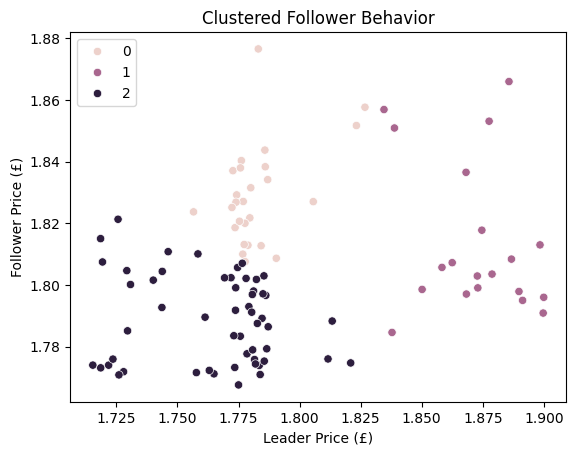

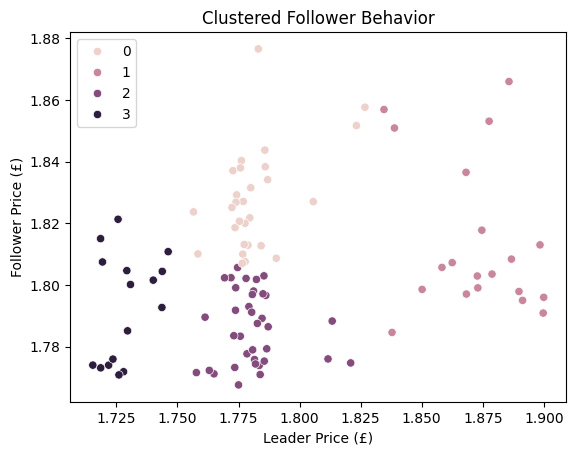

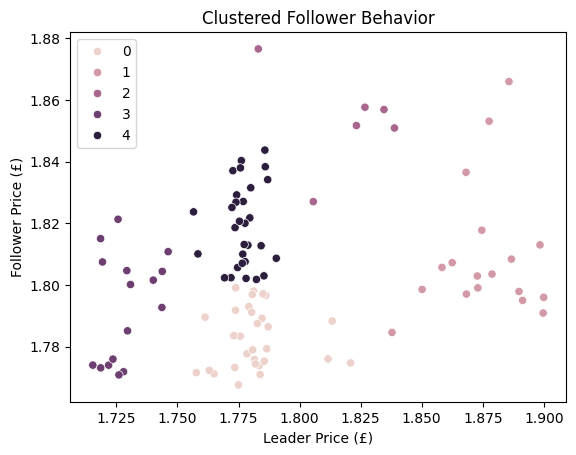

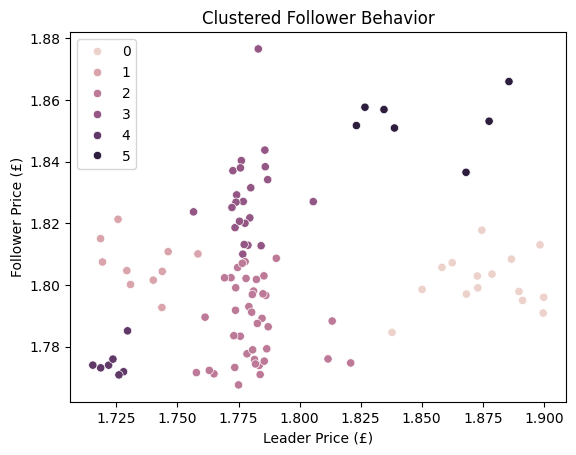

In [9]:
from sklearn.cluster import KMeans
from kneed.knee_locator import KneeLocator

for k in range(3, 7):
    X = data[["Leader's Price", "Follower's Price"]]
    kmeans = KMeans(n_clusters=k).fit(X)
    data['cluster'] = kmeans.labels_

    # Visualize
    sns.scatterplot(data=data, x="Leader's Price", y="Follower's Price", hue='cluster')
    plt.title('Clustered Follower Behavior')
    plt.xlabel('Leader Price (£)')
    plt.ylabel('Follower Price (£)')

    plt.legend()
    plt.show()

## Seasonal/Weekly Decomposition

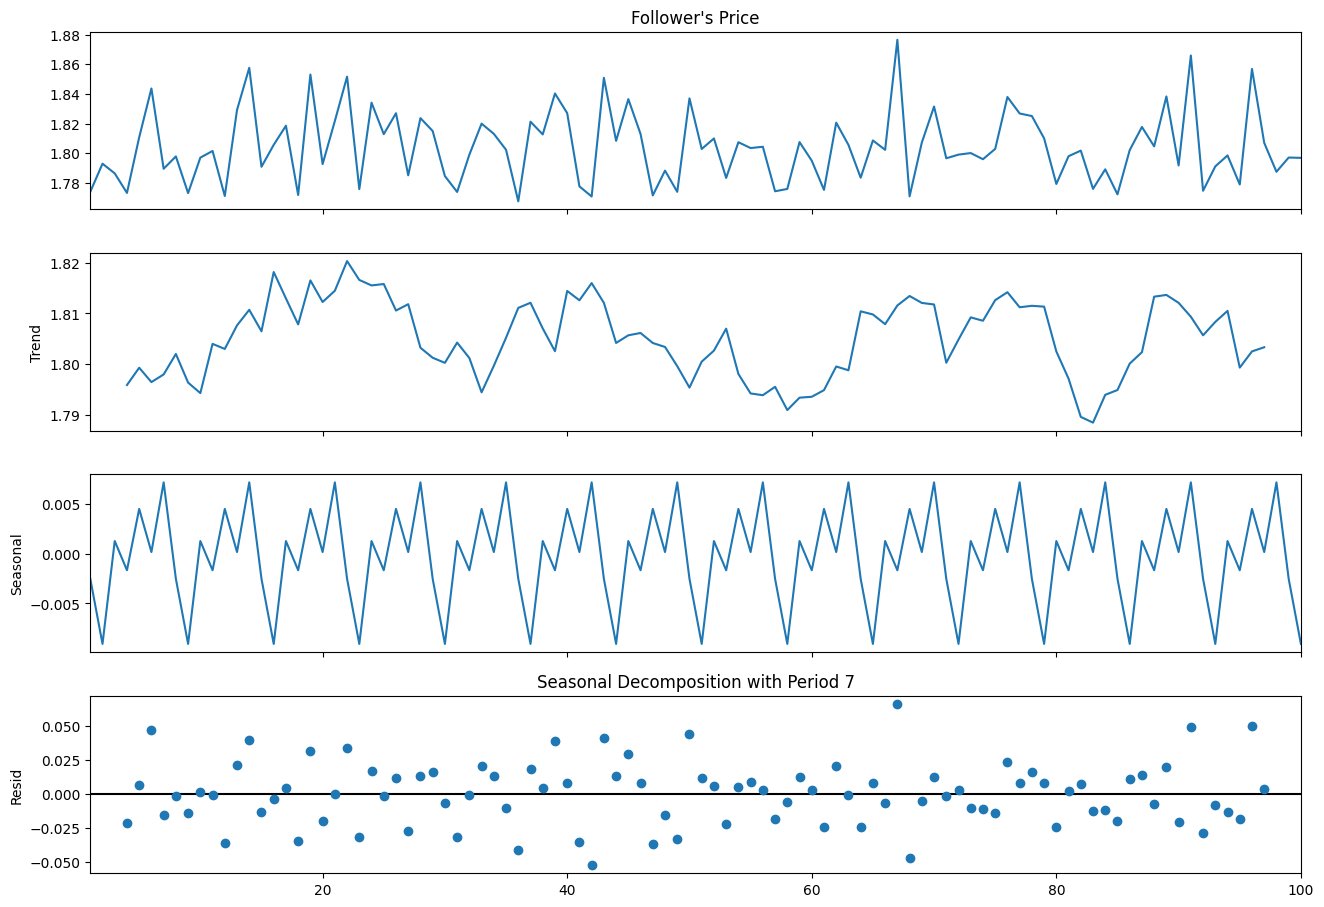

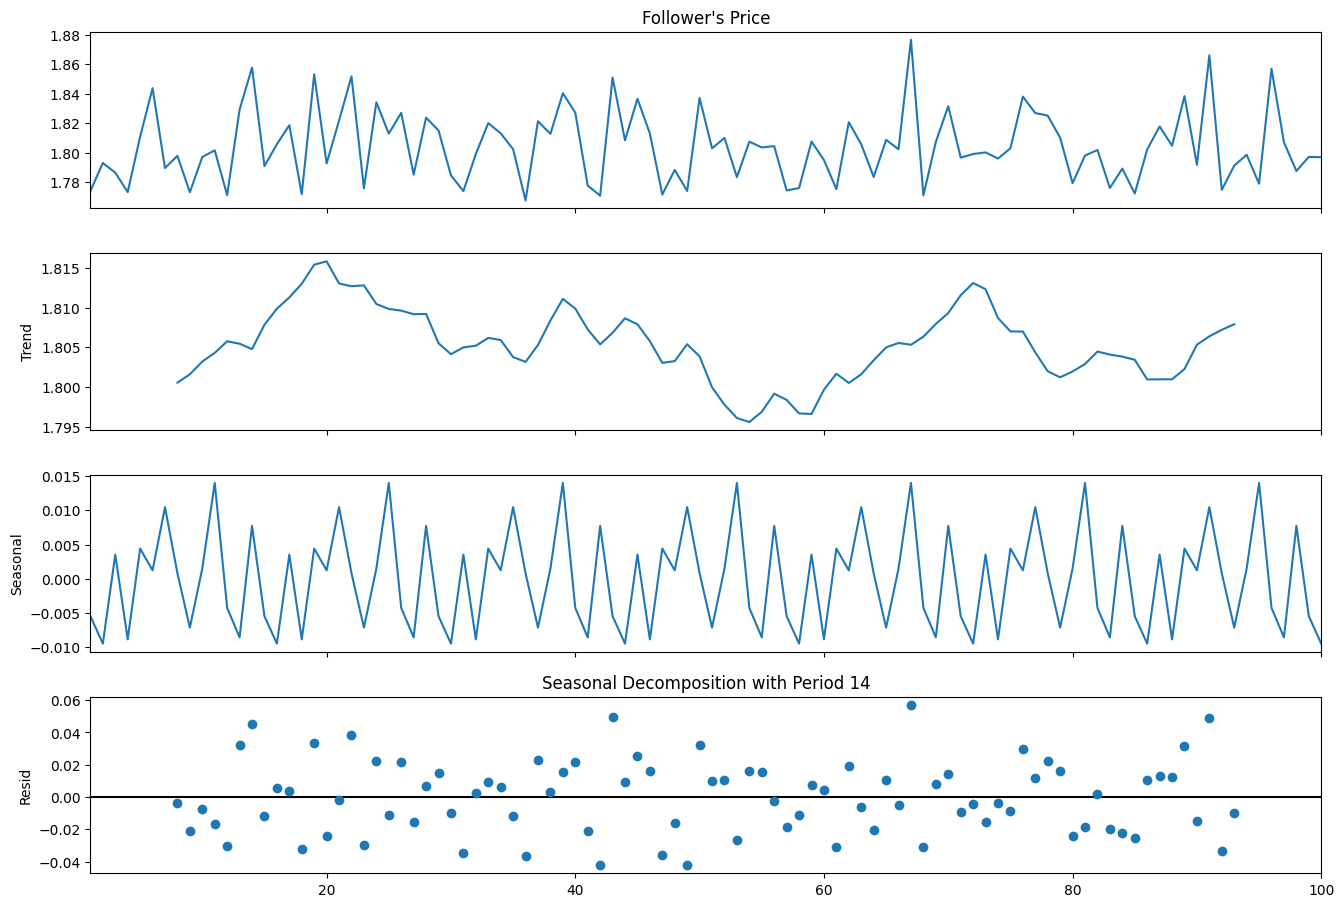

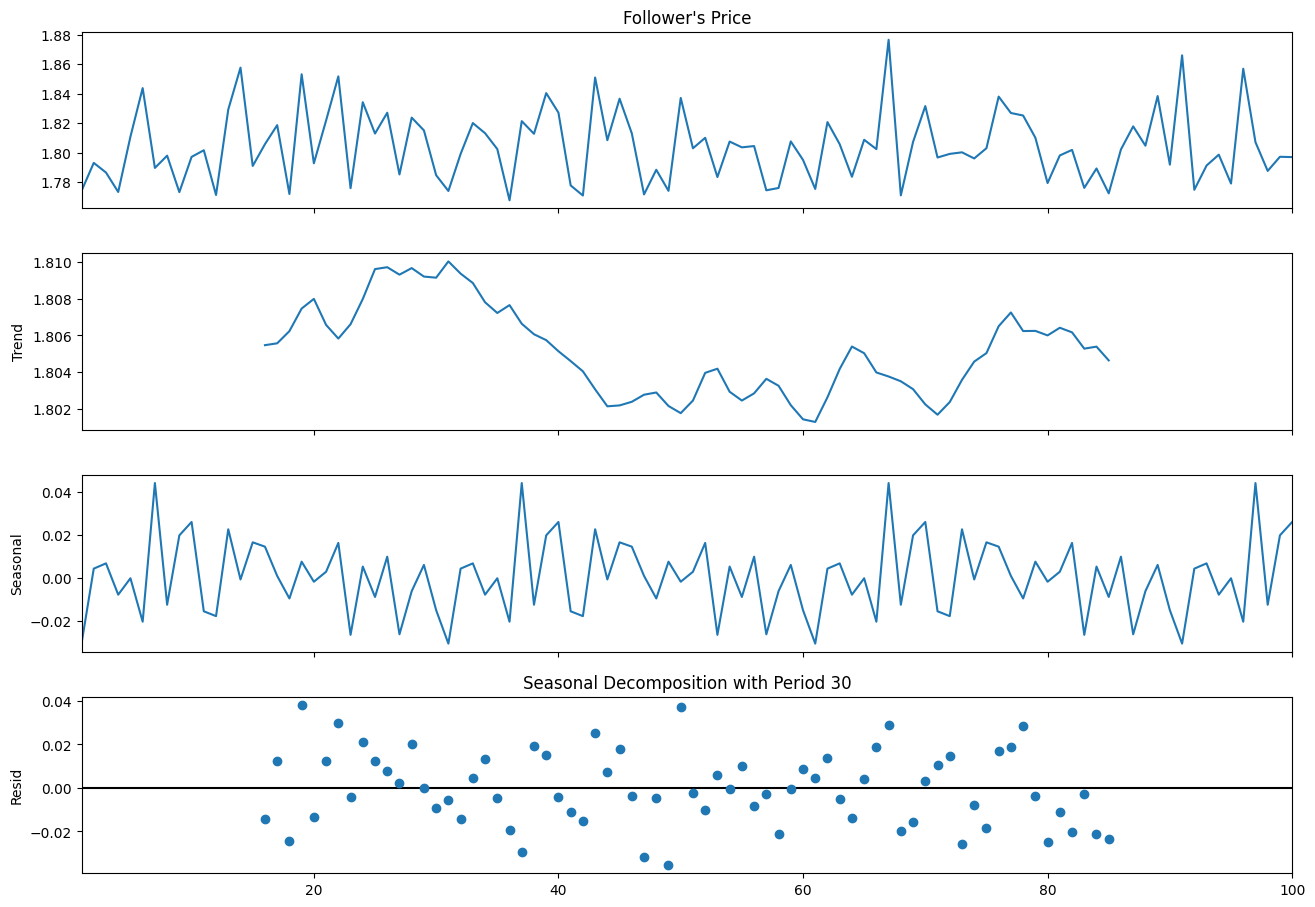

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

patterns = [7, 14, 30]  # Weekly, Bi-weekly, Monthly
for pattern in patterns:
    series = data.set_index("Date")["Follower's Price"]
    result = seasonal_decompose(series, model='additive', period=pattern)  # if weekly pattern expected
    fig = result.plot()
    fig.set_size_inches(15, 10)
    plt.title(f'Seasonal Decomposition with Period {pattern}')
    plt.show()


## Follower Reaction to Leader Price Change
Plot response to relative changes as opposed to absolute values

Text(0, 0.5, 'Δ Follower Price')

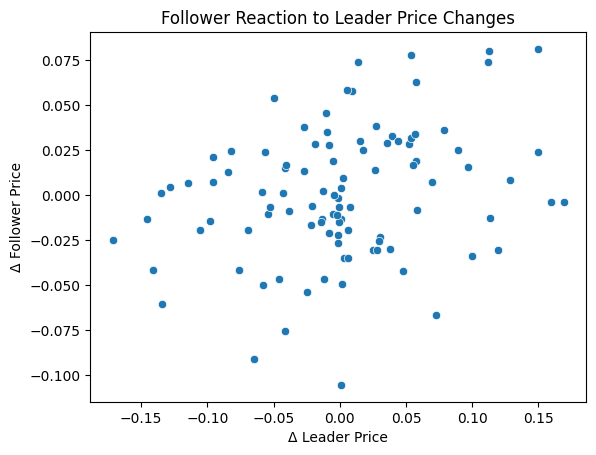

In [18]:
data['delta_leader'] = data["Leader's Price"].diff()
data['delta_follower'] = data["Follower's Price"].diff()

sns.scatterplot(x='delta_leader', y='delta_follower', data=data)
plt.title('Follower Reaction to Leader Price Changes')
plt.xlabel('Δ Leader Price')
plt.ylabel('Δ Follower Price')
